In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define the path to the directory
directory_path = r'C:\Users\shaif\Downloads\Compressed\To Baylor 2023-01-30\To Baylor 2023-01-30'

# Initialize empty lists for images and labels
X_train = []
Y_train = []
class_label = 0

# Loop through subdirectories (classes)
for folder in os.listdir(directory_path):
    #print(class_folder)
    clsp = os.path.join(directory_path,folder)  
    for class_folder in os.listdir(clsp):
        #print(class_folder)
        class_path = os.path.join(clsp, class_folder)    
        #print(class_path)
        for image_file in os.listdir(class_path):
            if image_file.endswith('.png'):
                image_path = os.path.join(class_path, image_file)
            
            # Load image, convert to RGB and resize
                img = Image.open(image_path).convert('RGB')
                img = img.resize((32, 32))
                img_array = np.array(img)
            
            # Append image and label to lists
                X_train.append(img_array)
                Y_train.append(class_label)
                #print(class_label)
    class_label = class_label + 1

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')


C:\Users\shaif\anaconda3\envs\tens\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X_train shape: (12795, 32, 32, 3)
Y_train shape: (12795,)


In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
Y_train_encoded = to_categorical(Y_train)
indices = np.arange(len(X_train))
np.random.shuffle(indices)
X_train_shuffled = X_train[indices]
Y_train_encoded_shuffled = Y_train_encoded[indices]
X_train, X_test, y_train, y_test = train_test_split(X_train_shuffled, Y_train_encoded_shuffled, test_size=0.2, random_state=42)

In [19]:
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping

model_path = r"C:\Users\shaif\Downloads\bm_ssl.h5"
model = load_model(model_path)
#model.layers[0].trainable = False
x = model.layers[-8].output  
output = Dense(2, activation='softmax')(x)
new_model = keras.models.Model(inputs=model.input, outputs=output)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, mode='max', verbose=1)
new_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(X_train, y_train, batch_size=32, epochs=100,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 19s 55ms/step - loss: 24.2344 - accuracy: 0.6924 - val_loss: 9.9269 - val_accuracy: 0.7812
Epoch 2/100
256/256 [==============================] - 13s 52ms/step - loss: 7.5874 - accuracy: 0.7727 - val_loss: 1.2116 - val_accuracy: 0.8145
Epoch 3/100
256/256 [==============================] - 12s 48ms/step - loss: 3.5802 - accuracy: 0.8000 - val_loss: 0.4981 - val_accuracy: 0.8345
Epoch 4/100
256/256 [==============================] - 13s 52ms/step - loss: 0.9860 - accuracy: 0.7978 - val_loss: 0.6386 - val_accuracy: 0.8477
Epoch 5/100
256/256 [==============================] - 14s 56ms/step - loss: 12.0634 - accuracy: 0.7661 - val_loss: 1.9237 - val_accuracy: 0.7900
Epoch 6/100
256/256 [==============================] - 14s 55ms/step - loss: 3.4288 - accuracy: 0.7791 - val_loss: 1.2825 - val_accuracy: 0.8364
Epoch 7/100
256/256 [==============================] - 13s 51ms/step - loss: 1.5967 - accuracy: 0.8300 - val_loss: 0.9574 - val_

256/256 [==============================] - 14s 53ms/step - loss: 1.5435 - accuracy: 0.8202 - val_loss: 0.6130 - val_accuracy: 0.8062
Epoch 57/100
256/256 [==============================] - 12s 47ms/step - loss: 0.8419 - accuracy: 0.8116 - val_loss: 2.2568 - val_accuracy: 0.8008
Epoch 58/100
256/256 [==============================] - 14s 53ms/step - loss: 0.9794 - accuracy: 0.8057 - val_loss: 1.8120 - val_accuracy: 0.8091
Epoch 59/100
256/256 [==============================] - 13s 51ms/step - loss: 0.5716 - accuracy: 0.8144 - val_loss: 0.6379 - val_accuracy: 0.8442
Epoch 60/100
256/256 [==============================] - 16s 61ms/step - loss: 0.5380 - accuracy: 0.8225 - val_loss: 3.4806 - val_accuracy: 0.8364
Epoch 61/100
256/256 [==============================] - 16s 64ms/step - loss: 0.5656 - accuracy: 0.8274 - val_loss: 3.5490 - val_accuracy: 0.8311
Epoch 62/100
256/256 [==============================] - 14s 55ms/step - loss: 1.0568 - accuracy: 0.8214 - val_loss: 7.6531 - val_accuracy

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
predictions = new_model.predict(np.array(X_test).astype('float32'))
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
balanced_accuracy = balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Test Balanced Accuracy:", balanced_accuracy)
print("Test Accuracy:", accuracy)

Test Balanced Accuracy: 0.8304003264280924
Test Accuracy: 0.8304025009769441


In [8]:
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(32,32,3), pooling="avg")
x =  Dense(500)(base_model.output)
output = Dense(2, activation='softmax')(x)
ne_model = Model(inputs=base_model.input, outputs=output)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, mode='max', verbose=1)
ne_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ne_model.fit(X_train, y_train, batch_size=32, epochs=150,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/150
256/256 [==============================] - 18s 50ms/step - loss: 0.7774 - accuracy: 0.9117 - val_loss: 1.2782 - val_accuracy: 0.8281
Epoch 2/150
256/256 [==============================] - 13s 50ms/step - loss: 0.1278 - accuracy: 0.9585 - val_loss: 0.0810 - val_accuracy: 0.9648
Epoch 3/150
256/256 [==============================] - 13s 49ms/step - loss: 0.0733 - accuracy: 0.9745 - val_loss: 0.1629 - val_accuracy: 0.9443
Epoch 4/150
256/256 [==============================] - 16s 63ms/step - loss: 0.0535 - accuracy: 0.9812 - val_loss: 0.0521 - val_accuracy: 0.9751
Epoch 5/150
256/256 [==============================] - 16s 63ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.2076 - val_accuracy: 0.9316
Epoch 6/150
256/256 [==============================] - 16s 61ms/step - loss: 0.0419 - accuracy: 0.9878 - val_loss: 0.2226 - val_accuracy: 0.9297
Epoch 7/150
256/256 [==============================] - 17s 66ms/step - loss: 0.0356 - accuracy: 0.9875 - val_loss: 0.0368 - val_ac

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
predictions = ne_model.predict(np.array(X_test).astype('float32'))
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
balanced_accuracy = balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Test Balanced Accuracy:", balanced_accuracy)
print("Test Accuracy:", accuracy)

Test Balanced Accuracy: 0.9683445990932824
Test Accuracy: 0.9683470105509965


In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

base_model = MobileNetV2(include_top=False, weights=None, input_shape=(32,32,3), pooling="avg")
x =  Dense(500)(base_model.output)
output = Dense(2, activation='softmax')(x) 
new_model = Model(inputs=base_model.input, outputs=output)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=40, mode='max', verbose=1)
new_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 19s 49ms/step - loss: 0.4713 - accuracy: 0.8461 - val_loss: 0.6932 - val_accuracy: 0.5034
Epoch 2/100
256/256 [==============================] - 9s 37ms/step - loss: 0.1971 - accuracy: 0.9216 - val_loss: 0.6943 - val_accuracy: 0.5034
Epoch 3/100
256/256 [==============================] - 9s 37ms/step - loss: 0.1376 - accuracy: 0.9480 - val_loss: 0.6985 - val_accuracy: 0.5034
Epoch 4/100
256/256 [==============================] - 10s 37ms/step - loss: 0.1431 - accuracy: 0.9509 - val_loss: 0.7020 - val_accuracy: 0.5034
Epoch 5/100
256/256 [==============================] - 9s 36ms/step - loss: 0.0851 - accuracy: 0.9708 - val_loss: 0.6956 - val_accuracy: 0.5034
Epoch 6/100
256/256 [==============================] - 10s 40ms/step - loss: 0.1152 - accuracy: 0.9628 - val_loss: 0.7082 - val_accuracy: 0.4966
Epoch 7/100
256/256 [==============================] - 10s 39ms/step - loss: 0.0869 - accuracy: 0.9695 - val_loss: 0.6933 - val_accur

256/256 [==============================] - 11s 41ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.4061 - val_accuracy: 0.9575
Epoch 58/100
256/256 [==============================] - 9s 37ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 1.2531 - val_accuracy: 0.9043
Epoch 59/100
256/256 [==============================] - 10s 37ms/step - loss: 0.0245 - accuracy: 0.9918 - val_loss: 0.6655 - val_accuracy: 0.9448
Epoch 60/100
256/256 [==============================] - 10s 38ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.4813 - val_accuracy: 0.9604
Epoch 61/100
256/256 [==============================] - 10s 39ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.2554 - val_accuracy: 0.9526
Epoch 62/100
256/256 [==============================] - 10s 39ms/step - loss: 0.0296 - accuracy: 0.9895 - val_loss: 0.2620 - val_accuracy: 0.9683
Epoch 63/100
256/256 [==============================] - 12s 46ms/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.1956 - val_accuracy:

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
predictions = new_model.predict(np.array(X_test).astype('float32'))
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
balanced_accuracy = balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Test Balanced Accuracy:", balanced_accuracy)
print("Test Accuracy:", accuracy)

Test Balanced Accuracy: 0.9628080268081514
Test Accuracy: 0.9628761234857366


In [14]:
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(include_top=False, weights=None, input_shape=(32,32,3), pooling="avg")
x =  Dense(500)(base_model.output)
output = Dense(2, activation='softmax')(x)
ne_model = Model(inputs=base_model.input, outputs=output)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, mode='max', verbose=1)
ne_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = ne_model.fit(X_train, y_train, batch_size=32, epochs=100,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 19s 56ms/step - loss: 0.9470 - accuracy: 0.8506 - val_loss: 0.9305 - val_accuracy: 0.6240
Epoch 2/100
256/256 [==============================] - 14s 54ms/step - loss: 0.1442 - accuracy: 0.9464 - val_loss: 0.1051 - val_accuracy: 0.9644
Epoch 3/100
256/256 [==============================] - 15s 58ms/step - loss: 0.0969 - accuracy: 0.9651 - val_loss: 0.0853 - val_accuracy: 0.9712
Epoch 4/100
256/256 [==============================] - 12s 46ms/step - loss: 0.0844 - accuracy: 0.9742 - val_loss: 0.1465 - val_accuracy: 0.9463
Epoch 5/100
256/256 [==============================] - 13s 50ms/step - loss: 0.0695 - accuracy: 0.9740 - val_loss: 0.0641 - val_accuracy: 0.9780
Epoch 6/100
256/256 [==============================] - 13s 52ms/step - loss: 0.0474 - accuracy: 0.9833 - val_loss: 0.2888 - val_accuracy: 0.8950
Epoch 7/100
256/256 [==============================] - 13s 53ms/step - loss: 0.0494 - accuracy: 0.9816 - val_loss: 0.1074 - val_ac

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
predictions = ne_model.predict(np.array(X_test).astype('float32'))
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
balanced_accuracy = balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Test Balanced Accuracy:", balanced_accuracy)
print("Test Accuracy:", accuracy)

Test Balanced Accuracy: 0.959386456899153
Test Accuracy: 0.9593591246580696


In [12]:
import os

# Specify the directory path
directory_path = "E:\\invasive-aquatic-species-data"

# List all folders in the directory
folders = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
print("Folders:", folders)


Folders: ['D-hinge', 'Non-Veliger', 'Ostracod', 'Ped', 'Umbo']


In [2]:
from PIL import Image
import os

def load_images_from_folder(base_path, limit=500):
    image_list = []
    for subdir, dirs, files in os.walk(base_path):
        for file in files:
            if len(image_list) >= limit:
                break
            try:
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                image_list.append(img)
            except IOError:
                # Handle the exception if the file cannot be opened.
                print(f"Cannot open {file}")
        if len(image_list) >= limit:
            break
    return image_list

base_directory = "E:\\invasive-aquatic-species-data"
invasive_images = load_images_from_folder(os.path.join(base_directory, 'invasive'))
noninvasive_images = load_images_from_folder(os.path.join(base_directory, 'noninvasive'))

print(f"Loaded {len(invasive_images)} invasive images.")
print(f"Loaded {len(noninvasive_images)} noninvasive images.")


Loaded 500 invasive images.
Loaded 500 noninvasive images.


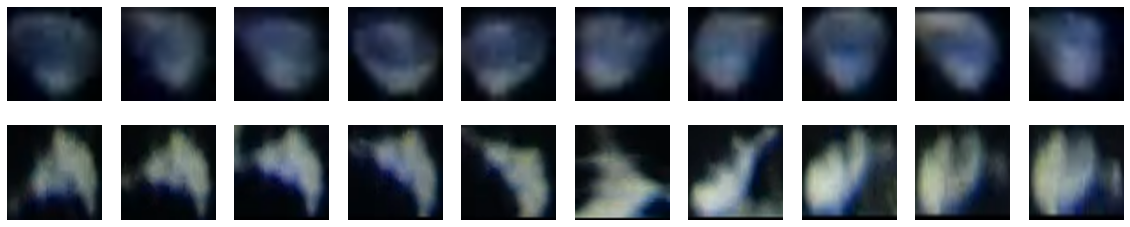

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_in_grid(invasive_images, noninvasive_images, indices, image_size=(128, 128)):
    num_images = len(indices)
    fig, axs = plt.subplots(2, num_images, figsize=(20, 4))  # Two rows for two categories
    
    # Plot invasive images in the first row
    for i, idx in enumerate(indices):
        resized_img = invasive_images[idx].resize(image_size)
        axs[0, i].imshow(resized_img)
        axs[0, i].axis('off')
        if i == 0:
            axs[0, i].set_ylabel('Invasive', size='large')
    
    # Plot noninvasive images in the second row
    for i, idx in enumerate(indices):
        resized_img = noninvasive_images[idx].resize(image_size)
        axs[1, i].imshow(resized_img)
        axs[1, i].axis('off')
        if i == 0:
            axs[1, i].set_ylabel('Noninvasive', size='large')

    plt.show()

# Example indices to display
indices = range(50, 60)  # Adjust this range as needed

# Assuming 'invasive_images' and 'noninvasive_images' are already loaded
if len(invasive_images) >= max(indices) and len(noninvasive_images) >= max(indices):
    plot_images_in_grid(invasive_images, noninvasive_images, indices)
else:
    print("The index range is out of bounds for the available images.")


In [13]:
import os

# Specify the directory path
directory_path = r"C:\Users\shaif\Downloads\Compressed\Invasive_Life_Stage"

# List all folders in the directory
folders = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
print("Folders:", folders)


Folders: ['D-hinge', 'Non-Veliger', 'Ostracod', 'Ped', 'Umbo']


In [14]:
from PIL import Image
import os

def load_images_from_subfolder(base_path, limit=500):
    image_list = []
    for subdir, dirs, files in os.walk(base_path):
        for file in files:
            if len(image_list) >= limit:
                break
            try:
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                image_list.append(img)
            except IOError:
                # Handle the exception if the file cannot be opened.
                print(f"Cannot open {file}")
        if len(image_list) >= limit:
            break
    return image_list

base_directory = "C:\\Users\\shaif\\Downloads\\Compressed\\Invasive_Life_Stage"
subfolders = ['D-hinge', 'Non-Veliger', 'Ostracod', 'Ped', 'Umbo']

# Dictionary to store images from each subfolder
subfolder_images = {}

for subfolder in subfolders:
    folder_path = os.path.join(base_directory, subfolder)
    subfolder_images[subfolder] = load_images_from_subfolder(folder_path)

# Displaying the number of images loaded from each subfolder
for subfolder, images in subfolder_images.items():
    print(f"Loaded {len(images)} images from {subfolder}")


Loaded 500 images from D-hinge
Loaded 500 images from Non-Veliger
Loaded 500 images from Ostracod
Loaded 500 images from Ped
Loaded 500 images from Umbo


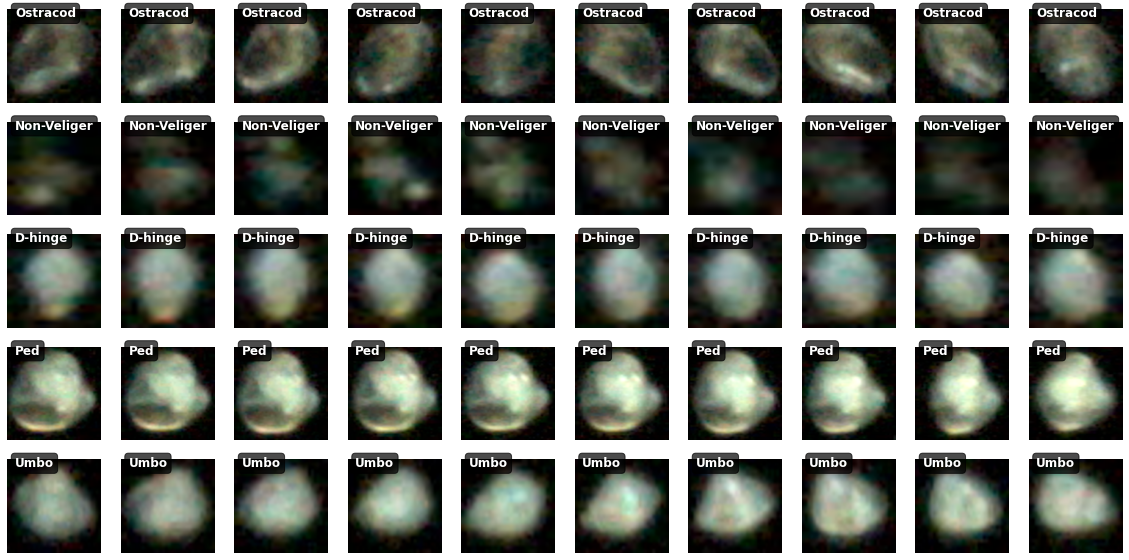

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_in_custom_order(image_dict, indices, image_size=(128, 128), label_positions=(10, 10)):
    # Order subfolders to ensure "Ostracod" and "Non-Veliger" are at the end
    ordered_folders = sorted(image_dict.keys(), key=lambda x: (x != 'Ostracod', x != 'Non-Veliger'))
    num_folders = len(ordered_folders)
    num_images = len(indices)
    
    fig, axs = plt.subplots(num_folders, num_images, figsize=(20, 2 * num_folders))
    
    for folder_idx, folder_name in enumerate(ordered_folders):
        images = image_dict[folder_name]
        for img_idx, idx in enumerate(indices):
            try:
                resized_img = images[idx].resize(image_size)
                axs[folder_idx, img_idx].imshow(resized_img)
                axs[folder_idx, img_idx].axis('off')
                # Add folder name as label on the image
                axs[folder_idx, img_idx].text(label_positions[0], label_positions[1], folder_name,
                                              color='white', fontsize=12, weight='bold',
                                              bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.3'))
            except IndexError:
                axs[folder_idx, img_idx].set_visible(False)
    
    plt.show()

# Define the indices of the images you want to display, for example:
indices = range(10)  # Adjust this range as needed

# Check if there are enough images in all subfolders for the requested indices
if all(len(images) >= max(indices) + 1 for images in subfolder_images.values()):
    plot_images_in_custom_order(subfolder_images, indices)
else:
    print("The index range is out of bounds for the available images in some subfolders.")
